In [1]:
from __future__ import print_function
from pycocotools.coco import COCO
import os, sys, zipfile
import numpy as np
import shutil
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import urllib.request
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
%matplotlib inline

In [2]:
# Record package versions for reproducibility
print("os: %s" % os.name)
print("sys: %s" % sys.version)
print("numpy: %s, %s" % (np.__version__, np.__file__))

os: nt
sys: 3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]
numpy: 1.17.0, c:\users\student\anaconda3\envs\fashion\lib\site-packages\numpy\__init__.py


In [73]:
# Setup data paths
dataDir = 'C:Users/student/cocoapi/dataset/train/'
#dataType = 'val2017'
annDir = '{}/annos'.format(dataDir)
#annZipFile = '{}/annotations_train{}.zip'.format(dataDir, dataType)
annFile = '{}/.json'.format(annDir, dataType)
annURL = 'C:Users/student/cocoapi/dataset/train/'.format(dataType)
print (annDir)
print (annFile)
print (annZipFile)
print (annURL)

C:/users/student/cocoapi/dataset/train//annos
C:/users/student/cocoapi/dataset/train/deepfashion2train10000.json
../../annotations_trainval2017.zip
C:/Users/student/cocoapi/dataset/train/


In [4]:
# Download data if not available locally
if not os.path.exists(annDir):
    os.makedirs(annDir)
if not os.path.exists(annFile):
    if not os.path.exists(annZipFile):
        print ("Downloading zipped annotations to " + annZipFile + " ...")
        with urllib.request.urlopen(annURL) as resp, open(annZipFile, 'wb') as out:
            shutil.copyfileobj(resp, out)
        print ("... done downloading.")
    print ("Unzipping " + annZipFile)
    with zipfile.ZipFile(annZipFile,"r") as zip_ref:
        zip_ref.extractall(dataDir)
    print ("... done unzipping")
print ("Will use annotations in " + annFile)

Will use annotations in ../../annotations/instances_val2017.json


In [74]:
# initialize COCO api for instance annotations
coco=COCO('C:/users/student/cocoapi/dataset/train/deepfashion2train10000.json')

loading annotations into memory...
Done (t=4.02s)
creating index...
index created!


In [75]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
short_sleeved_shirt long_sleeved_shirt short_sleeved_outwear long_sleeved_outwear vest sling shorts trousers skirt short_sleeved_dress long_sleeved_dress vest_dress sling_dress

COCO supercategories: 
clothes


In [84]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [2])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [88]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['C:/Users/student/cocoapi/dataset/train/image/{}.jpg'.format(img['id'])])
plt.axis('off')
plt.imshow(I)
plt.show()

KeyError: 'C:/Users/student/cocoapi/dataset/train/image/2.jpg'

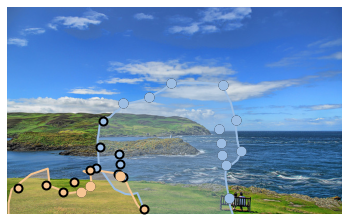

In [86]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [78]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: 'C:/users/student/cocoapi/dataset/train//annotations/person_keypoints_val2017.json'

0

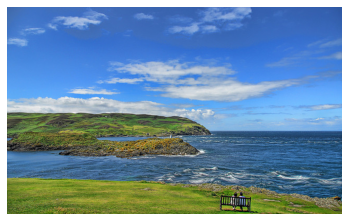

In [79]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [80]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: 'C:/users/student/cocoapi/dataset/train//annotations/captions_val2017.json'

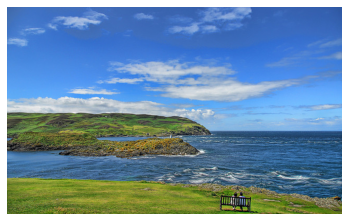

In [81]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()